Reading Standard Workload File

In [1]:
FEATURES_NUMBER = 18
with open('test2.txt', 'r+', encoding='utf-8') as f:
    data = f.read().splitlines(True)
    
data = [ line.replace('\n', '').replace('\t', ' ').split() for line in data if not line.startswith(';')]
data = [[float(value) for value in line] for line in data if len(line) == FEATURES_NUMBER]
print(data[:10])
print(len(data))

[[1.0, 0.0, 3.0, 169.0, 1.0, 161.0, 1048576.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0], [2.0, 0.0, 7.0, 56212.0, 1.0, 49351.0, 1048576.0, -1.0, -1.0, -1.0, 1.0, 2.0, 1.0, 2.0, -1.0, -1.0, -1.0, -1.0], [3.0, 1.0, 43.0, 2.0, 1.0, -1.0, 16777216.0, -1.0, -1.0, -1.0, 1.0, 3.0, 1.0, 3.0, -1.0, -1.0, -1.0, -1.0], [4.0, 1.0, 1967.0, 116.0, 1.0, 41.0, 4194304.0, -1.0, -1.0, -1.0, 1.0, 4.0, 2.0, 4.0, -1.0, -1.0, -1.0, -1.0], [5.0, 3.0, 9.0, 0.0, 1.0, -1.0, 2097152.0, -1.0, -1.0, -1.0, 0.0, 5.0, 1.0, 5.0, -1.0, -1.0, -1.0, -1.0], [6.0, 3.0, 11.0, 3.0, 1.0, 2.0, 1048576.0, -1.0, -1.0, -1.0, 1.0, 6.0, 1.0, 6.0, -1.0, -1.0, -1.0, -1.0], [7.0, 3.0, 9.0, 22.0, 1.0, 2.0, 1048576.0, -1.0, -1.0, -1.0, 1.0, 6.0, 1.0, 6.0, -1.0, -1.0, -1.0, -1.0], [8.0, 3.0, 8.0, 191.0, 1.0, 184.0, 1048576.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0], [9.0, 4.0, 18.0, 3.0, 1.0, 2.0, 1048576.0, -1.0, -1.0, -1.0, 1.0, 6.0, 1.0, 6.0, -1.0, -1.0, -1.0, -1.0], [10.0, 4.0, 18.0, 11.0, 1

Converting it to pandas dataframe, removing not needed columns

In [2]:
import numpy as np
import pandas as pd

np_data = np.array(data, dtype=int)
print(np_data.shape)

labels = ['submit time', 'wait time', 'run time', 'cpu used', 'memory used','user id']
np_data = np.delete(np_data, [0, 4, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17], 1)
print(np_data.shape)
print(len(labels))
df = pd.DataFrame(np_data, columns=labels)
print(df.head())

(13085792, 18)
(13085792, 6)
6
   submit time  wait time  run time  cpu used  memory used  user id
0            0          3       169       161      1048576        1
1            0          7     56212     49351      1048576        2
2            1         43         2        -1     16777216        3
3            1       1967       116        41      4194304        4
4            3          9         0        -1      2097152        5


In [31]:
a = []
for i in range(10):
    a.append([i, i*2])
a_np = np.array(a)
np.mean(a_np, axis=0)

array([4.5, 9. ])

Grouping by user id

In [17]:
grouped = df.groupby('user id').mean()
grouped['count'] = df.groupby('user id')['user id'].transform('count')
grouped.pop('wait time')
grouped.pop('submit time')

user id
1       8.560553e+05
2       1.144584e+06
3       1.295007e+06
4       1.259699e+06
5       2.705729e+05
            ...     
1610    2.580741e+06
1611    2.585348e+06
1612    2.584119e+06
1613    2.587790e+06
1614    2.590314e+06
Name: submit time, Length: 1614, dtype: float64

Data preprocessing

In [18]:
from sklearn import preprocessing
user_profiles = grouped.to_numpy()
scaler = preprocessing.StandardScaler().fit(user_profiles)
user_profiles = scaler.transform(user_profiles)
user_profiles[:10]

array([[-0.245991  , -0.19995745, -0.68999861, -0.39984326],
       [ 0.45924206,  0.3534707 , -0.6894509 , -0.44897658],
       [-0.2418466 , -0.20157523,  0.96727918, -0.45839145],
       [-0.22069321, -0.18697623, -0.53344762, -0.40186006],
       [-0.18554036, -0.16900904, -0.56886901, -0.45755033],
       [-0.25131051, -0.20179532, -0.67922728, -0.45755033],
       [-0.15352898, -0.11008446, -0.65442032, -0.44972858],
       [-0.08937969, -0.0531625 , -0.60248623, -0.45755033],
       [ 3.0588201 ,  2.01566188, -0.36185362, -0.45755033],
       [-0.12090801, -0.08213179, -0.37776397, -0.45839145]])

Visualizing data

In [19]:
import matplotlib.pyplot as plt
def plot_2d_scatter(X, y):
    fig, plot = plt.subplots()
    fig.set_size_inches(12, 12)
    plt.prism()
    
    for i in np.unique(y):
        cluster = (y == i)

        dim0 = X[cluster, 0]
        dim1 = X[cluster, 1]
        label = f"Cluster {i}"
        plot.scatter(dim0, dim1, label=label)
    
    plot.set_xticks(())
    plot.set_yticks(())

    plt.title("Workload logs")
    plt.tight_layout()
    plt.legend()
    plt.show()

In [20]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

def visualize_clustered_data(data):
    kmeans = KMeans(n_clusters=3).fit(data)
    tsne = TSNE(n_components=2, metric='euclidean', perplexity=50).fit_transform(data)
    plot_2d_scatter(tsne, kmeans.labels_)
    return kmeans.labels_

/Users/jakubmysliwiec/.asdf/installs/python/3.10.2/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/jakubmysliwiec/.asdf/installs/python/3.10.2/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


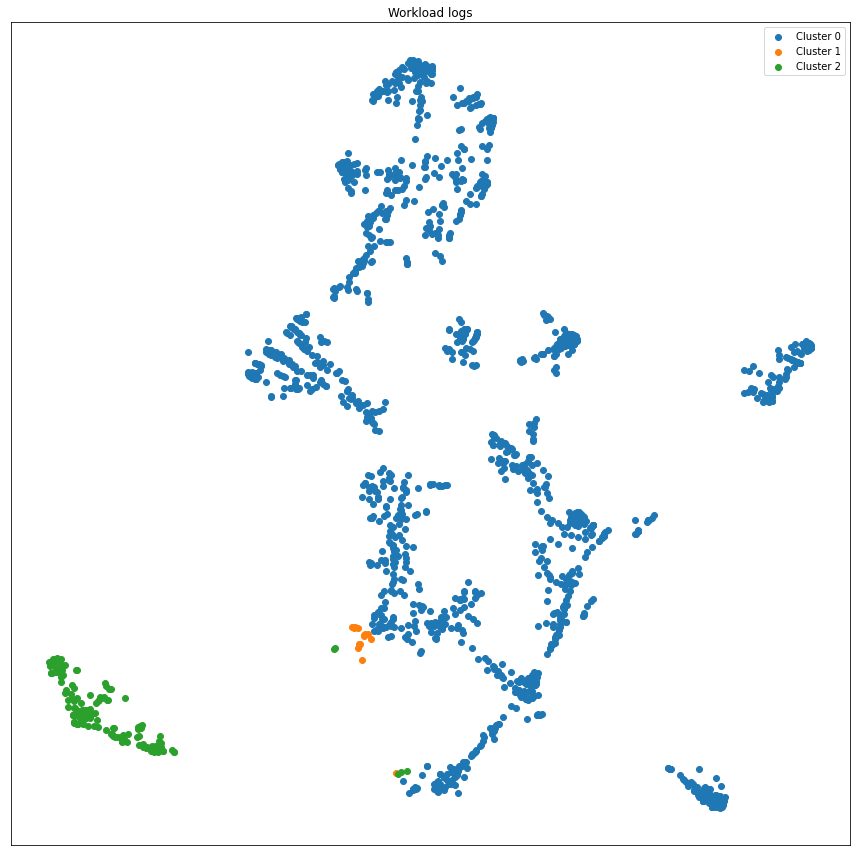

In [21]:
labels = visualize_clustered_data(user_profiles)

In [22]:
grouped[labels == 0]

,run time,cpu used,memory used,count
user id,,,,
1,429.766585,208.546786,1.048576e+06,47404
2,38658.537339,30843.334803,1.053774e+06,15977
3,654.423359,118.995431,1.677761e+07,9955
4,1801.090909,927.117027,2.534383e+06,46114
5,3706.631587,1921.683458,2.198203e+06,10493
...,...,...,...,...
1608,71.484536,29.340206,9.166932e+06,1501
1609,10.363636,-0.727273,3.050403e+07,47404
1612,0.000000,-1.000000,3.355443e+07,1501


In [23]:
grouped[labels == 1]

,run time,cpu used,memory used,count
user id,,,,
100,3.187791e+05,2.942063e+05,2.097152e+06,2091
291,5.071584e+05,1.027000e+05,4.194304e+06,10493
648,1.024945e+06,1.685586e+06,2.097152e+06,47404
676,3.490110e+05,1.049758e+05,1.677722e+07,5666
936,6.828710e+05,4.118980e+05,1.342177e+08,2148005
981,4.863820e+05,4.905555e+05,1.677722e+07,58550
985,2.674299e+05,2.618954e+05,2.414902e+06,58550
1004,7.544450e+05,2.313400e+04,4.194304e+06,58550
1059,1.928364e+05,2.764582e+05,6.710886e+07,2148005


In [24]:
grouped[labels == 2]

,run time,cpu used,memory used,count
user id,,,,
221,9495.132530,10793.457831,1.677722e+07,2148005
222,17352.763034,18873.265987,9.404144e+06,2148005
223,25222.101695,24271.197740,1.048576e+07,2148005
224,2501.906888,2411.430356,4.918931e+06,2148005
225,168.285714,159.571429,8.388608e+06,2148005
...,...,...,...,...
1597,891.800000,543.200000,4.194304e+06,2148005
1599,220.309558,190.519258,9.175414e+06,2115199
1607,221.285714,203.571429,2.097152e+06,2148005
